In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

In [0]:
#data
x=np.array([[0, 0], [0,1], [1,0], [1,1]])
#label
y=np.array([0, 1, 1, 0])

In [3]:
x.shape

(4, 2)

In [0]:
params = {}
np.random.seed(2)
params['w_1'] = np.random.rand(2, 2)
params['b_1'] = np.zeros(2)

params['w_2'] = np.random.rand(2)
params['b_2'] = 0

In [0]:
#params = {'b_1': np.array([0., 0.]), 'b_2': 0, 'w_1': np.array([[-0.22003537, -0.55113639],
        #[-0.056351  ,  0.78391545]]), 'w_2': np.array([ 1.69519554, -1.57077622])}

In [6]:
params

{'b_1': array([0., 0.]), 'b_2': 0, 'w_1': array([[0.4359949 , 0.02592623],
        [0.54966248, 0.43532239]]), 'w_2': array([0.4203678 , 0.33033482])}

In [0]:
def backprop(x, t, p):
    
    N = x.shape[0]
 
    # forward pass
    h_in = np.dot(x, p['w_1'].T) + p['b_1']
    h_out = sigmoid(h_in)
    y_in = np.dot(h_out, p['w_2'].T) + p['b_2']
    y_out = sigmoid(y_in)
    
    # loss 
    # loss = (1/2)*np.sum((y_out - t)**2)    
    loss = (1./N) * np.sum(-t * np.log(y_out) - (1 - t) * np.log(1 - y_out))
    
    # backprop
    l_bar = 1
    # yout_bar = y_out - t
    # yout_bar = ((-t)/y_out) + ((1-t)/(1-y_out))   
    yout_bar = (1./N) * (y_out - t)

    yin_bar = yout_bar * sigmoid(y_in) * (1 - sigmoid(y_in))
    b2_bar = np.dot(yin_bar.T, np.ones(N))
    w2_bar = np.dot(yin_bar.T, h_out)
    hout_bar = np.outer(yin_bar, p['w_2'])
    hin_bar = hout_bar * sigmoid(h_in) * (1 - sigmoid(h_in))
    b1_bar = np.dot(hin_bar.T, np.ones(N))
    w1_bar = np.dot(hin_bar.T, x)

    # Wrap our gradients in a dictionary.
    grads = {}
    grads['w_1'] = w1_bar
    grads['w_2'] = w2_bar
    grads['b_1'] = b1_bar
    grads['b_2'] = b2_bar
    
    return grads, loss

In [8]:
"""
num_steps = 20000
alpha = 0.2
cost_list=[]
for step in range(num_steps):        
    grads, loss = backprop(x, y,params)
    for k in params:
        params[k] -= alpha * grads[k]
    cost_list.append(loss)
"""

'\nnum_steps = 20000\nalpha = 0.2\ncost_list=[]\nfor step in range(num_steps):        \n    grads, loss = backprop(x, y,params)\n    for k in params:\n        params[k] -= alpha * grads[k]\n    cost_list.append(loss)\n'

In [0]:
iterations = 0
loss = 1
cost_list=[]
alpha = 0.3
while loss > 0.01:
    iterations+=1
    grads, loss = backprop(x, y, params)
    for k in params:
        params[k] -= alpha * grads[k]
    cost_list.append(loss)

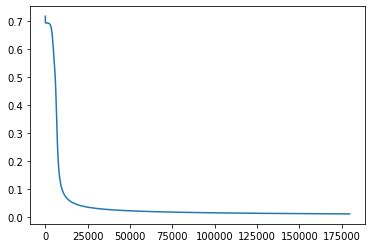

In [10]:
plt.plot(cost_list)

In [11]:
params

{'b_1': array([-7.5905812 , -3.05395555]),
 'b_2': -4.960001920624812,
 'w_1': array([[4.95096294, 4.94874687],
        [6.78073753, 6.77199414]]),
 'w_2': array([-11.29550268,  10.61182277])}

In [0]:
def forward(x, p):
    h_in = np.dot(x,params['w_1'].T)  + params['b_1']
    h_out = sigmoid(h_in)
    y_in = np.dot(h_out,params['w_2'].T) + params['b_2']
    y_out = sigmoid(y_in)
    return y_out

In [13]:
forward(x[0], params)

0.011121684584022752

In [14]:
forward(x[1], params)

0.9905212007408865

In [15]:
forward(x[2], params)

0.9905266746581891

In [16]:
forward(x[3], params)

0.009725771931519142